In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model = joblib.load("model_RF.pkl")

column_order = ['Date', 'Bid', 'Ask', 'Opening price', 'High price', 'Low price', 'Closing price', 'Average price', 'Total volume', 'Turnover', 'Trades']
data = pd.read_csv("../../Data/Raw_data/SHB_A-1999-01-06-2024-02-05.csv", sep=";", decimal=",", skiprows=1, usecols=column_order)

columns_to_drop = ["Bid", "Ask", "Opening price", "Average price"]
data = data.set_index("Date").drop(columns=columns_to_drop)

data.drop(data.index[100:], inplace=True)

data

,High price,Low price,Closing price,Total volume,Turnover,Trades
Date,,,,,,
2024-02-02,113.35,111.55,112.40,4351375.0,4.896353e+08,5539
2024-02-01,113.45,111.10,111.35,5566891.0,6.232837e+08,6901
2024-01-31,114.30,112.55,112.55,5180940.0,5.847794e+08,5316
2024-01-30,114.20,112.80,113.65,2873323.0,3.266947e+08,3750
2024-01-29,114.70,113.10,113.30,3901108.0,4.436254e+08,5006
...,...,...,...,...,...,...
2023-09-19,96.60,95.04,96.58,3990763.0,3.838455e+08,4884
2023-09-18,96.20,94.68,95.02,4659719.0,4.414624e+08,4713
2023-09-15,96.30,95.12,96.30,8572539.0,8.237110e+08,6635


In [2]:
SHORT_CHANGE_HORIZON = 5
MID_CHANGE_HORIZON = 20
LONG_CHANGE_HORIZON = 50

data["Short_day_change"] = (data["Closing price"] - data["Closing price"].shift(-SHORT_CHANGE_HORIZON)) / SHORT_CHANGE_HORIZON
data["Mid_day_change"] = (data["Closing price"] - data["Closing price"].shift(-MID_CHANGE_HORIZON)) / MID_CHANGE_HORIZON
data["Long_day_change"] = (data["Closing price"] - data["Closing price"].shift(-LONG_CHANGE_HORIZON)) / LONG_CHANGE_HORIZON

features = data[["Short_day_change", "Mid_day_change", "Long_day_change"]].iloc[0]
features.values

array([-0.4   ,  0.0975,  0.2756])

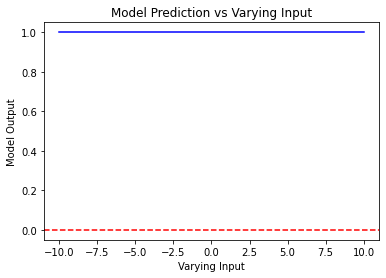

In [3]:
import sklearn

varying_input_values = np.linspace(-10, 10, 100)  # Adjust the range and number of points as needed

# Step 2: Make Predictions
predictions = []
for varying_input in varying_input_values:
    
    input_data = np.insert(features.values, 0, varying_input)
    prediction = model.predict(np.array(input_data).reshape(1, -1))  # Reshape for single sample
    predictions.append(prediction[0])  # Assuming the prediction is a single value

plt.step(varying_input_values, predictions, where='post', color='b')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')  # Add a horizontal line at y=0
plt.xlabel('Varying Input')
plt.ylabel('Model Output')
plt.title('Model Prediction vs Varying Input')
plt.show()